In [1]:
import numpy as np
from copy import deepcopy
import itertools
import matplotlib
from numpy import radians as rad
from matplotlib.animation import FuncAnimation
from scipy.ndimage import convolve,convolve1d
import cmasher
import seaborn as sns
from collections import defaultdict
from manim import *
import networkx as nx
from scipy.interpolate import interp1d
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import random
from networkx.drawing.nx_pydot import graphviz_layout
from scipy.special import softmax
import itertools as it

In [2]:
import hloss_misc as _hloss

In [187]:
from collections import deque

In [468]:
import torch.nn.functional as F

# Intro

In [536]:
class Intro(Scene):
    
    def construct(self):
        LAYOUT_CONFIG = {"vertex_spacing": (1, 1)}
        VERTEX_CONF = {"radius": 0.25, "color": BLACK, "fill_opacity": 1, "stroke_opacity": 1, "stroke_color": WHITE, "stroke_width": 2}
        
        graph = Graph(
            list(G.nodes), 
            list(G.edges), 
            layout="tree", 
            root_vertex=0, 
            layout_config=LAYOUT_CONFIG,
            vertex_config=VERTEX_CONF,
        )
        leaves = [node for node in G.nodes() if G.degree(node) == 1]
        N_leaves = len(leaves)
        
        GT = leaves[2]
        ground_truth = [GT]
        gt = GT
        for _ in range(4):
            for p in G.predecessors(gt):
                ground_truth.append(p)
                gt = p

        self.play(FadeIn(graph))
        self.wait(1)

        poodle = ImageMobject("images/poodle.jpg")
        poodle.scale(0.11)
        poodle.move_to(graph[GT])
        
        self.play(FadeIn(poodle))
        self.wait(1)

        labels_gt = [Text("", font_size=30), Text("dog", font_size=30), Text("animal", font_size=30), Text("", font_size=30)]
        for i, l in enumerate(ground_truth):
            labels_gt[i].next_to(graph[l])
            self.play(graph[l].animate.set_fill(WHITE), Write(labels_gt[i]))
            
        labradoodle = ImageMobject("images/labradoodle.jpg")
        labradoodle.scale(0.11)
        labradoodle.move_to(graph[7])
        
        self.play(FadeIn(labradoodle))
        self.wait(1)

        table = ImageMobject("images/table.jpg")
        table.scale(0.11)
        table.move_to(graph[4])
        
        self.play(FadeIn(table))
        self.wait(2)

In [537]:
%manim Intro

Manim Community v0.18.1

[10/29/24 14:47:55] INFO     Animation 0 : Using cached data (hash :                           ]8;id=655072;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=896718;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             3977891868_1413458727_223132457)                                                      

                    INFO     Animation 1 : Using cached data (hash :                           ]8;id=46323;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=62252;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2919340033_1992872043)                                                     

                    INFO     Animation 2 : Using cached data (hash :                           ]8;id=800146;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=685689;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2860673305_157116644)                                                      

                    INFO     Animation 3 : Using cached data (hash :                           ]8;id=16755;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=786708;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2919340033_60366636)                                                       

[10/29/24 14:47:56] INFO     Animation 4 : Using cached data (hash :                           ]8;id=998221;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=39519;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2600613504_1913661751)                                                     

                    INFO     Animation 5 : Using cached data (hash :                           ]8;id=988313;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=866135;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_1899824088_727631489)                                                      

[10/29/24 14:47:58] INFO     Animation 6 : Partial movie file written in                   ]8;id=372174;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=739204;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/Intro/2852726489_39426416                         
                             9_3427839718.mp4'                                                                     

                    INFO     Animation 7 : Using cached data (hash :                           ]8;id=909670;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=381008;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2791274784_3483046307)                                                     

                    INFO     Animation 8 : Using cached data (hash :                           ]8;id=218650;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=542579;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2451330640_2441227736)                                                     

                    INFO     Animation 9 : Using cached data (hash :                           ]8;id=512524;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=737299;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2919340033_1321528801)                                                     

                    INFO     Animation 10 : Using cached data (hash :                          ]8;id=927892;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=128832;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_3889081434_1249191988)                                                     

[10/29/24 14:48:00] INFO     Animation 11 : Partial movie file written in                  ]8;id=671482;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=442472;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/Intro/2852726489_78417955                         
                             2_354652916.mp4'                                                                      

                    INFO     Combining to Movie file.                                      ]8;id=213367;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=555414;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=70104;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=958409;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/Intro.mp4'                                                            
                                                                                                                   

                    INFO     Rendered Intro                                                            ]8;id=971211;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=626525;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 12 animations                                                                  

# Flat softmax

In [542]:
def assign_parents(likelihoods, children):
    par_dict = defaultdict(int)
    for n, l in zip(children, likelihoods):
        parent = list(G.predecessors(n))[0]
        par_dict[parent] += l
    return par_dict


class TaxonomicTree(Scene):
    
    def construct(self):
        LAYOUT_CONFIG = {"vertex_spacing": (1, 1)}
        VERTEX_CONF = {"radius": 0.25, "color": BLACK, "fill_opacity": 1, "stroke_opacity": 1, "stroke_color": WHITE, "stroke_width": 2}
        
        graph = Graph(
            list(G.nodes), 
            list(G.edges), 
            layout="tree", 
            root_vertex=0, 
            layout_config=LAYOUT_CONFIG,
            vertex_config=VERTEX_CONF,
        )
        leaves = [node for node in G.nodes() if G.degree(node) == 1]
        N_leaves = len(leaves)
        
        GT = leaves[2]
        ground_truth = [GT]
        gt = GT
        for _ in range(4):
            for p in G.predecessors(gt):
                ground_truth.append(p)
                gt = p

        leaves_vertices = VGroup(*[graph[l].copy() for l in leaves])
        squares = [Square().scale(0.5).move_to(graph[l].get_center()) for l in leaves]
        boxes = VGroup(*squares)
        ##### Graph appears #####
        title = Text("Flat softmax loss", font_size=60).next_to(graph, UP)
        self.play(FadeIn(graph), Write(title))
        self.wait(2)
        self.play(FadeIn(boxes), Unwrite(title))
        self.wait(1)

        self.play(boxes.animate.shift(DOWN))

        logits = [random.uniform(0, 1) for _ in squares]

        cmap = cmasher.get_sub_cmap(sns.dark_palette("#9CDCEB", as_cmap=True), 0, 1)
        nn_text = Text("Neural network\noutput layer", font_size=30).next_to(boxes, LEFT)
        logit_text = Text("logits", font_size=30).next_to(boxes, RIGHT)
        lik_text = Text("likelihoods", font_size=30).next_to(graph[leaves[0]], RIGHT)
        arrow = CurvedArrow(start_point=logit_text.get_right(), end_point=lik_text.get_right()).shift(RIGHT*0.2)
        softmax_text = MathTex(r"\frac{e^{l_{i}}}{\sum_{j=1}^K e^{l_{j}}}", font_size=30).move_to(arrow.get_right()).shift(RIGHT*0.6)

        color_anim = [square.animate.set_fill(RED, opacity=logits[i]) for i, square in enumerate(squares)]
        text_objs = [Text(f"{l:.2f}", font_size=30).move_to(b.get_center()) for l, b in zip(logits, boxes)] # remove later
        text_anim = [Write(t) for t in text_objs]
        self.play(Write(nn_text))
        self.play(*(color_anim + text_anim))
        self.wait(2)
        self.play(Write(logit_text), Unwrite(nn_text))
        self.wait(1)
        
        likelihoods = softmax(logits)
        text_objs_softmax1 = [Text(f"{l:.2f}", font_size=15).move_to(graph[b].get_center()) for l, b in zip(likelihoods, leaves)] # remove later
        text_anim_softmax = [Write(t) for t in text_objs_softmax1]

        color_anim_softmax = [graph[l].animate.set_fill(rgba_to_color(cmap(likelihoods[i]))) for i, l in enumerate(leaves)]
        
        self.play(*(color_anim_softmax + text_anim_softmax + [Write(softmax_text), Write(arrow), Write(lik_text)]))
        self.wait(3)
        
        self.play(Unwrite(logit_text), Unwrite(softmax_text), Unwrite(lik_text), Unwrite(arrow))
        self.wait(1)

        def get_middle(i):
            return (graph[leaves[i]].get_center() + graph[leaves[i-1]].get_center()) / 2

        plus1 = MathTex(r"+", font_size=30).move_to(get_middle(4))
        plus2 = MathTex(r"+", font_size=30).move_to(get_middle(3))
        plus3 = MathTex(r"+", font_size=30).move_to(get_middle(2))
        plus4 = MathTex(r"+", font_size=30).move_to(get_middle(1))

        equals_1 = MathTex(r"= 1", font_size=30).next_to(graph[leaves[0]], RIGHT)

        self.play(*[Write(t) for t in [plus1, plus2, plus3, plus4, equals_1]])
        self.wait(1)
        self.play(*[Unwrite(t) for t in [plus2, plus4, equals_1]])
        self.wait(1)

        ##### Repeat for parents #####
        parents = assign_parents(likelihoods, leaves)
        nods, likelihoods_p = zip(*parents.items())
        text_objs_pars2 = [Text(f"{l:.2f}", font_size=15).move_to(graph[b].get_center()) for l, b in zip(likelihoods_p, nods)] # remove later
        text_anim_pars = [Write(t) for t in text_objs_pars2]
        
        self.play(*([graph[l].animate.set_fill(rgba_to_color(cmap(likelihoods_p[i]))) for i, l in enumerate(nods)] + text_anim_pars + [Unwrite(t) for t in [plus1, plus3]]))

        def get_middle_parents(i):
            return (graph[nods[i]].get_center() + graph[nods[i-1]].get_center()) / 2
        
        plusp1 = MathTex(r"+", font_size=30).move_to(get_middle_parents(2))
        plusp2 = MathTex(r"+", font_size=30).move_to(get_middle_parents(1))

        equals_1 = MathTex(r"= 1", font_size=30).next_to(graph[nods[0]], RIGHT)

        self.play(*[Write(t) for t in [plusp1, plusp2, equals_1]])
        self.play(*[Unwrite(t) for t in [plusp1, equals_1]])

        ##### Repeat for parents #####
        parents = assign_parents(likelihoods_p, nods)
        nods, likelihoods_p = zip(*parents.items())
        text_objs_pars3 = [Text(f"{l:.2f}", font_size=15).move_to(graph[b].get_center()) for l, b in zip(likelihoods_p, nods)] # remove later
        text_anim_pars = [Write(t) for t in text_objs_pars3]
        self.play(*([graph[l].animate.set_fill(rgba_to_color(cmap(likelihoods_p[i]))) for i, l in enumerate(nods)] + text_anim_pars+ [Unwrite(plusp2)]))

        plusp1 = MathTex(r"+", font_size=30).move_to(get_middle_parents(1))

        self.play(*[Write(t) for t in [plusp1]])

        ##### Repeat for parents #####
        parents = assign_parents(likelihoods_p, nods)
        nods, likelihoods_p = zip(*parents.items())
        text_objs_pars4 = [Text(f"1", font_size=15).move_to(graph[b].get_center()) for l, b in zip(likelihoods_p, nods)] # remove later
        text_anim_pars = [Write(t) for t in text_objs_pars4]
        self.play(*[graph[l].animate.set_fill(rgba_to_color(cmap(likelihoods_p[i]))) for i, l in enumerate(nods)] + text_anim_pars + [Unwrite(plusp1)])
        self.wait(1)

        ##### Second graph #####
        graph_copy = Graph(
            list(G.nodes), 
            list(G.edges), 
            layout="tree", 
            root_vertex=0, 
            layout_config=LAYOUT_CONFIG,
            vertex_config=VERTEX_CONF,
        )
        for i, l in enumerate(ground_truth):
            graph_copy[l].set_fill(WHITE) 
        SHIFT_CONST = 3
        all_texts = text_objs + text_objs_softmax1 + text_objs_pars2 + text_objs_pars3 + text_objs_pars4
        self.play(*[FadeOut(x) for x in all_texts])
        self.play(
            graph_copy.animate.move_to(LEFT*SHIFT_CONST), 
            graph.animate.move_to(RIGHT*SHIFT_CONST), 
            boxes.animate.shift(RIGHT*SHIFT_CONST),
            FadeOut(boxes),
        )
        gt_text = Text("Ground truth", font_size=30).next_to(graph_copy, UP)
        lh_text = Text("Likelihoods", font_size=30).next_to(graph, UP)
        self.play(FadeIn(gt_text), FadeIn(lh_text))
        self.wait(1)

        probs_eq_str = ["{{p_" + f"{5-i}"+ "}}" for i in range(len(leaves))]
        ys_eq_str = ["{{y_" + f"{5-i}"+ "}}" for i in range(len(leaves))]
        
        probs_eq = [MathTex(*s, font_size=40).next_to(graph[leaves[i]], DOWN) for i, s in enumerate(probs_eq_str)]
        ys_eq = [MathTex(*s, font_size=40).next_to(graph_copy[leaves[i]], DOWN) for i, s in enumerate(ys_eq_str)]
        
        probs = VGroup(*probs_eq)
        ys = VGroup(*ys_eq)
        self.play(FadeIn(probs), FadeIn(ys))
        self.wait(1)

        gt_leaf = graph_copy[GT]
        surbox = SurroundingRectangle(gt_leaf, color=YELLOW)
        gt_leaf2 = graph[GT]
        surbox2 = SurroundingRectangle(gt_leaf2, color=YELLOW)
        self.play(FadeIn(surbox, surbox2))
        self.wait(1)

        # equation
        eq = [
            "\L = -", "(", "{{y_1}}", "log(", "{{p_1}}", ") + ",
            "{{y_2}}", "log(", "{{p_2}}", ") + ",
            "{{y_3}}", "log(", "{{p_3}}", ")", " + ",
            "{{y_4}}", "log(", "{{p_4}}", ") + ",
            "{{y_5}}", "log(", "{{p_5}}", ")", ")",
        ]
        nll = MathTex(*eq, font_size=40).move_to(DOWN*2.8)
        self.play(FadeIn(nll))
        self.wait(2)

        eq = [
            "\L = -", "(", "0\cdot", "log(", "{{p_1}}", ") + ",
            "0\cdot", "log(", "{{p_2}}", ") + ",
            "1\cdot", "log(", "{{p_3}}", ")", " + ",
            "0\cdot", "log(", "{{p_4}}", ") + ",
            "0\cdot", "log(", "{{p_5}}", ")", ")",
        ]
        nll_coef = MathTex(*eq, font_size=40).move_to(DOWN*2.8)
        self.play(TransformMatchingTex(nll, nll_coef))
        self.wait(2)

        self.play(*[ShrinkToCenter(nll_coef[i]) for i, s in enumerate(eq) if i not in (0,11,12,13)])

        nll2 = MathTex("\L = -", "log(", "{{p_3}}", ")",
              font_size=40).move_to(DOWN*2.8)
        self.play(TransformMatchingShapes(nll_coef, nll2))
        self.wait(1)

        self.play(FadeOut(surbox, surbox2, nll2))
        self.play(graph_copy[GT].animate.set_fill(BLACK))

        GT_GENUS = ground_truth[1]
        
        gt_genus = graph_copy[GT_GENUS]
        surbox = SurroundingRectangle(gt_genus, color=YELLOW)
        gt_genus2 = graph[GT_GENUS]
        surbox2 = SurroundingRectangle(gt_genus2, color=YELLOW)
        self.play(FadeIn(surbox, surbox2))

        # equation
        eq = [
            "\L = -", "(", 
            "{{y_{12}}}", "log(", "{{p_1 + p_2}}", ") + ",
            "{{y_{34}}}", "log(", "{{p_3 + p_4}}", ")", " + ",
            "{{y_5}}", "log(", "{{p_5}}", ")", 
            ")",
        ]
        nll = MathTex(*eq, font_size=40).move_to(DOWN*2.8)
        self.play(FadeIn(nll))
        self.wait(2)

        eq = [
            "\L = -", "(", 
            "0\cdot", "log(", "{{p_1 + p_2}}", ") + ",
            "1\cdot", "log(", "{{p_3 + p_4}}", ")", " + ",
            "0\cdot", "log(", "{{p_5}}", ")", 
            ")",
        ]
        nll_coef = MathTex(*eq, font_size=40).move_to(DOWN*2.8)
        self.play(TransformMatchingTex(nll, nll_coef))
        self.wait(2)

        self.play(*[ShrinkToCenter(nll_coef[i]) for i, s in enumerate(eq) if i not in (0, 7, 8, 9)])

        nll2 = MathTex("\L = -", "log(", "{{p_3 + p_4}}", ")",
              font_size=40).move_to(DOWN*2.8)
        self.play(TransformMatchingShapes(nll_coef, nll2))
        self.wait(1)

        self.play(FadeOut(surbox, surbox2, nll2))
        self.play(graph_copy[GT_GENUS].animate.set_fill(BLACK))

        GT_GENUS = ground_truth[2]
        gt_genus = graph_copy[GT_GENUS]
        surbox = SurroundingRectangle(gt_genus, color=YELLOW)
        gt_genus2 = graph[GT_GENUS]
        surbox2 = SurroundingRectangle(gt_genus2, color=YELLOW)
        self.play(FadeIn(surbox, surbox2))

        # equation
        eq = [
            "\L = -", "(", 
            "{{y_{12}}}", "log(", "{{p_1 + p_2}}", ") + ",
            "{{y_{345}}}", "log(", "{{p_3 + p_4 + p_5}}", ")",
            ")",
        ]
        nll = MathTex(*eq, font_size=40).move_to(DOWN*2.8)
        self.play(FadeIn(nll))
        self.wait(2)

        eq = [
            "\L = -", "(", 
            "0\cdot", "log(", "{{p_1 + p_2}}", ") + ",
            "1\cdot", "log(", "{{p_3 + p_4 + p_5}}", ")",
            ")",
        ]
        nll_coef = MathTex(*eq, font_size=40).move_to(DOWN*2.8)
        self.play(TransformMatchingTex(nll, nll_coef))
        self.wait(2)

        self.play(*[ShrinkToCenter(nll_coef[i]) for i, s in enumerate(eq) if i not in (0, 7, 8, 9)])

        nll2 = MathTex("\L = -", "log(", "{{p_3 + p_4 + p_5}}", ")",
              font_size=40).move_to(DOWN*2.8)
        self.play(TransformMatchingShapes(nll_coef, nll2))
        self.wait(1)

In [543]:
%manim TaxonomicTree

Manim Community v0.18.1

[10/29/24 15:32:56] INFO     Animation 0 : Using cached data (hash :                           ]8;id=448123;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=7865;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             3977891868_2823784134_223132457)                                                      

[10/29/24 15:32:58] INFO     Animation 1 : Partial movie file written in                   ]8;id=885304;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=319576;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             784179552_3533600655.mp4'                                                             

[10/29/24 15:33:00] INFO     Animation 2 : Partial movie file written in                   ]8;id=776024;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=886481;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             3757621655_3983795215.mp4'                                                            

[10/29/24 15:33:01] INFO     Animation 3 : Partial movie file written in                   ]8;id=477334;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=111757;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2919340033_2561357929.mp4'                                                            

[10/29/24 15:33:02] INFO     Animation 4 : Partial movie file written in                   ]8;id=933384;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=549865;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             238943339_3204283817.mp4'                                                             

[10/29/24 15:33:05] INFO     Animation 5 : Partial movie file written in                   ]8;id=69250;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=812645;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2554262629_3953688080.mp4'                                                            

[10/29/24 15:33:06] INFO     Animation 6 : Partial movie file written in                   ]8;id=527941;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=222769;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             42143861_2536016086.mp4'                                                              

[10/29/24 15:33:08] INFO     Animation 7 : Partial movie file written in                   ]8;id=221756;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=624345;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             784179552_2917800025.mp4'                                                             

[10/29/24 15:33:11] INFO     Animation 8 : Partial movie file written in                   ]8;id=460743;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=678749;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             13537375_3441698519.mp4'                                                              

[10/29/24 15:33:12] INFO     Animation 9 : Partial movie file written in                   ]8;id=352252;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=646447;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2919340033_2206272767.mp4'                                                            

[10/29/24 15:33:14] INFO     Animation 10 : Partial movie file written in                  ]8;id=115645;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=747178;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             3217819581_735972970.mp4'                                                             

[10/29/24 15:33:16] INFO     Animation 11 : Partial movie file written in                  ]8;id=243605;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=640717;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             3891874688_1621215949.mp4'                                                            

[10/29/24 15:33:18] INFO     Animation 12 : Partial movie file written in                  ]8;id=144927;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=334697;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             822479444_1926033686.mp4'                                                             

[10/29/24 15:33:19] INFO     Animation 13 : Partial movie file written in                  ]8;id=515468;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=127053;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             3890345977_169838868.mp4'                                                             

[10/29/24 15:33:20] INFO     Animation 14 : Partial movie file written in                  ]8;id=614245;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=631234;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2350963155_1307480209.mp4'                                                            

[10/29/24 15:33:21] INFO     Animation 15 : Partial movie file written in                  ]8;id=403573;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=666959;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2919340033_286957066.mp4'                                                             

[10/29/24 15:33:23] INFO     Animation 16 : Partial movie file written in                  ]8;id=618435;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=647784;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             836139966_514004427.mp4'                                                              

[10/29/24 15:33:24] INFO     Animation 17 : Partial movie file written in                  ]8;id=942845;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=633266;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2919340033_1509077421.mp4'                                                            

[10/29/24 15:33:25] INFO     Animation 18 : Partial movie file written in                  ]8;id=221801;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=823987;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             3425491073_96821833.mp4'                                                              

[10/29/24 15:33:27] INFO     Animation 19 : Partial movie file written in                  ]8;id=846876;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=414611;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2505765810_2485112672.mp4'                                                            

[10/29/24 15:33:28] INFO     Animation 20 : Partial movie file written in                  ]8;id=80007;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=858521;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             3748802750_1150787715.mp4'                                                            

[10/29/24 15:33:30] INFO     Animation 21 : Partial movie file written in                  ]8;id=258601;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=172590;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             493072416_1620083156.mp4'                                                             

[10/29/24 15:33:32] INFO     Animation 22 : Partial movie file written in                  ]8;id=786227;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=685904;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             3227092798_896852080.mp4'                                                             

[10/29/24 15:33:33] INFO     Animation 23 : Partial movie file written in                  ]8;id=62873;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=457421;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             4206743803_3095711917.mp4'                                                            

[10/29/24 15:33:35] INFO     Animation 24 : Partial movie file written in                  ]8;id=36036;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=343628;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2919340033_905567420.mp4'                                                             

[10/29/24 15:33:37] INFO     Animation 25 : Partial movie file written in                  ]8;id=964145;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=27220;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             1499752561_2294133178.mp4'                                                            

[10/29/24 15:33:39] INFO     Animation 26 : Partial movie file written in                  ]8;id=669061;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=132998;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             87180758_1328007105.mp4'                                                              

[10/29/24 15:33:40] INFO     Animation 27 : Partial movie file written in                  ]8;id=159807;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=219248;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             3439006275_4256543032.mp4'                                                            

[10/29/24 15:33:42] INFO     Animation 28 : Partial movie file written in                  ]8;id=127978;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=575666;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2919340033_3046936334.mp4'                                                            

[10/29/24 15:33:43] INFO     Animation 29 : Partial movie file written in                  ]8;id=202549;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=142912;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             3790198939_1697437116.mp4'                                                            

[10/29/24 15:33:44] INFO     Animation 30 : Partial movie file written in                  ]8;id=338337;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=280112;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2919340033_2856820261.mp4'                                                            

[10/29/24 15:33:46] INFO     Animation 31 : Partial movie file written in                  ]8;id=16362;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=634513;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2532910373_1914690088.mp4'                                                            

[10/29/24 15:33:47] INFO     Animation 32 : Partial movie file written in                  ]8;id=972318;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=283829;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2919340033_786856983.mp4'                                                             

[10/29/24 15:33:50] INFO     Animation 33 : Partial movie file written in                  ]8;id=446890;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=355446;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             1664750188_2116931195.mp4'                                                            

[10/29/24 15:33:53] INFO     Animation 34 : Partial movie file written in                  ]8;id=178707;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=219043;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             784179552_2321161487.mp4'                                                             

[10/29/24 15:33:57] INFO     Animation 35 : Partial movie file written in                  ]8;id=398070;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=237313;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2476821624_2334233036.mp4'                                                            

[10/29/24 15:33:59] INFO     Animation 36 : Partial movie file written in                  ]8;id=852084;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=832409;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             1141282389_3425697463.mp4'                                                            

[10/29/24 15:34:01] INFO     Animation 37 : Partial movie file written in                  ]8;id=92981;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=529026;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             3461969945_2396893577.mp4'                                                            

[10/29/24 15:34:04] INFO     Animation 38 : Partial movie file written in                  ]8;id=138523;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=207613;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             281377990_1946949373.mp4'                                                             

[10/29/24 15:34:05] INFO     Animation 39 : Partial movie file written in                  ]8;id=313703;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=929339;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2919340033_1352777268.mp4'                                                            

[10/29/24 15:34:07] INFO     Animation 40 : Partial movie file written in                  ]8;id=797405;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=355858;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             1357744148_2666386399.mp4'                                                            

[10/29/24 15:34:08] INFO     Animation 41 : Partial movie file written in                  ]8;id=507004;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=101115;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             637230132_579520565.mp4'                                                              

[10/29/24 15:34:10] INFO     Animation 42 : Partial movie file written in                  ]8;id=692151;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=715229;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             3505480252_1135542279.mp4'                                                            

[10/29/24 15:34:12] INFO     Animation 43 : Partial movie file written in                  ]8;id=305897;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=59610;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             4155236459_1690474269.mp4'                                                            

[10/29/24 15:34:14] INFO     Animation 44 : Partial movie file written in                  ]8;id=299417;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=395919;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             784179552_1531365926.mp4'                                                             

[10/29/24 15:34:16] INFO     Animation 45 : Partial movie file written in                  ]8;id=257288;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=339552;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             877168067_1871170862.mp4'                                                             

[10/29/24 15:34:18] INFO     Animation 46 : Partial movie file written in                  ]8;id=484328;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=658484;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             784179552_1292665071.mp4'                                                             

[10/29/24 15:34:20] INFO     Animation 47 : Partial movie file written in                  ]8;id=451118;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=756433;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             1053950381_3199301970.mp4'                                                            

[10/29/24 15:34:22] INFO     Animation 48 : Partial movie file written in                  ]8;id=387006;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=970997;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             84521314_242458027.mp4'                                                               

[10/29/24 15:34:23] INFO     Animation 49 : Partial movie file written in                  ]8;id=755254;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=320249;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2919340033_1064237916.mp4'                                                            

[10/29/24 15:34:25] INFO     Animation 50 : Partial movie file written in                  ]8;id=570281;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=430819;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2175709849_3374435705.mp4'                                                            

[10/29/24 15:34:27] INFO     Animation 51 : Partial movie file written in                  ]8;id=817465;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=981488;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2301275511_2329961126.mp4'                                                            

[10/29/24 15:34:29] INFO     Animation 52 : Partial movie file written in                  ]8;id=330367;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=596133;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             3274665269_472667593.mp4'                                                             

[10/29/24 15:34:32] INFO     Animation 53 : Partial movie file written in                  ]8;id=213513;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=917369;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             860738690_887212737.mp4'                                                              

[10/29/24 15:34:33] INFO     Animation 54 : Partial movie file written in                  ]8;id=364452;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=688670;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             784179552_1950234892.mp4'                                                             

[10/29/24 15:34:36] INFO     Animation 55 : Partial movie file written in                  ]8;id=931300;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=558400;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             1602221686_1118422194.mp4'                                                            

[10/29/24 15:34:38] INFO     Animation 56 : Partial movie file written in                  ]8;id=816193;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=677612;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             784179552_1287592665.mp4'                                                             

[10/29/24 15:34:40] INFO     Animation 57 : Partial movie file written in                  ]8;id=214378;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=708565;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             3718684460_2835528240.mp4'                                                            

[10/29/24 15:34:42] INFO     Animation 58 : Partial movie file written in                  ]8;id=555255;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=918957;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             1100121400_854761811.mp4'                                                             

[10/29/24 15:34:43] INFO     Animation 59 : Partial movie file written in                  ]8;id=685659;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=88588;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/TaxonomicTree/2852726489_                         
                             2919340033_1845396995.mp4'                                                            

                    INFO     Combining to Movie file.                                      ]8;id=513050;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=784774;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#617\617]8;;\

[10/29/24 15:34:44] INFO                                                                   ]8;id=333393;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=768337;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/TaxonomicTree.mp4'                                                    
                                                                                                                   

                    INFO     The partial movie directory is full (> 100 files). Therefore, ]8;id=931897;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=961107;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#707\707]8;;\
                             manim has removed the 102 oldest file(s). You can change this                         
                             behaviour by changing max_files_cached in config.                                     

                    INFO     Rendered TaxonomicTree                                                    ]8;id=950028;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=734635;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 60 animations                                                                  

# Conditional softmax

In [544]:
class ConditionalSoftmax(Scene):
    
    def construct(self):
        LAYOUT_CONFIG = {"vertex_spacing": (1, 1)}
        VERTEX_CONF = {"radius": 0.25, "color": BLACK, "fill_opacity": 1, "stroke_opacity": 1, "stroke_color": WHITE, "stroke_width": 2}
        
        graph = Graph(
            list(G.nodes), 
            list(G.edges), 
            layout="tree", 
            root_vertex=0, 
            layout_config=LAYOUT_CONFIG,
            vertex_config=VERTEX_CONF,
        )
        leaves = [node for node in G.nodes() if G.degree(node) == 1]
        N_leaves = len(leaves)
        
        GT = leaves[2]
        INDEX_MAP = {n: i for i, n in enumerate(G.nodes())}
        ground_truth = [GT]
        gt = GT
        for _ in range(4):
            for p in G.predecessors(gt):
                ground_truth.append(p)
                gt = p

        leaves_vertices = VGroup(*[graph[l].copy() for l in leaves])

        title = Text("Conditional softmax loss", font_size=60).next_to(graph, UP)
        self.play(FadeIn(graph), Write(title))
        self.wait(2)
        self.play(Unwrite(title))

        all_nodes = VGroup(*[graph[l].copy() for l in G.nodes()])

        all_nodes.arrange(buff=0.5)

        self.play(*[Transform(graph[l], all_nodes[i]) for i, l in enumerate(G.nodes())] + [FadeOut(graph.edges[edge]) for edge in graph.edges])

        self.wait(1)

        squares = [Square().scale(0.5).move_to(n.get_center()) for n in all_nodes]
        boxes = VGroup(*squares)

        self.play(FadeIn(boxes))
        self.wait(1)

        self.play(boxes.animate.shift(DOWN))

        cmap = cmasher.get_sub_cmap(sns.dark_palette("#FC6255", as_cmap=True), 0, 1)

        logits = [random.uniform(0, 1) for _ in squares]
        logit_text = Text("logits", font_size=20).next_to(boxes, RIGHT)
        # lik_text = Text("likelihoods", font_size=20).next_to(all_nodes, RIGHT)
        # arrow = CurvedArrow(start_point=logit_text.get_right(), end_point=lik_text.get_right()).shift(RIGHT*0.05)
        # softmax_text = MathTex(r"\frac{e^{l_{i}}}{\sum_{j=1}^K e^{l_{j}}}", font_size=20).move_to(arrow.get_right()).shift(RIGHT*0.6)

        color_anim = [square.animate.set_fill(RED, opacity=logits[i]) for i, square in enumerate(squares)]
        text_objs = [Text(f"{l:.2f}", font_size=30).move_to(b.get_center()) for l, b in zip(logits, boxes)] # remove later
        text_anim = [Write(t) for t in text_objs]
        self.play(*(color_anim + text_anim))
        self.play(Write(logit_text))
        self.wait(1)

        # likelihoods = softmax(logits)
        likelihoods = logits
        order_map = {g: i for i, g in enumerate(G.nodes())}
        text_objs_softmax1 = [Text(f"{l:.2f}", font_size=15).move_to(b.get_center()) for l, b in zip(likelihoods, all_nodes)]
        text_anim_softmax = [Write(t) for t in text_objs_softmax1]

        color_anim_softmax = [graph[l].animate.set_fill(rgba_to_color(cmap(likelihoods[i]))) for i, l in enumerate(G.nodes())]
        
        # self.play(*(color_anim_softmax + text_anim_softmax + [Write(softmax_text), Write(arrow), Write(lik_text)]))
        self.play(*(color_anim_softmax + text_anim_softmax))
        self.wait(1)

        # all_texts = text_objs + [logit_text, lik_text, arrow]
        all_texts = text_objs + [logit_text]
        self.play(*[Unwrite(x) for x in all_texts] + [FadeOut(boxes)])

        self.wait(1)

        # Transform nodes and text back to their original graph layout
        original_layout = graph._layout
        labels = text_objs_softmax1

        # Animate nodes and their labels back to their original positions
        for i, l in enumerate(G.nodes()):
            graph[l].generate_target()
            graph[l].target.move_to(original_layout[l])
            labels[i].generate_target()
            labels[i].target.move_to(graph[l].target.get_center())
        
        self.play(
            *[MoveToTarget(graph[l]) for l in G.nodes()],
            *[MoveToTarget(labels[i]) for i, l in enumerate(G.nodes())],
            run_time=2,
            rate_func=smooth
        )
        self.play(*[FadeIn(graph.edges[edge]) for edge in graph.edges])
        
        self.wait(1)

        cmap_blue = cmasher.get_sub_cmap(sns.dark_palette("#9CDCEB", as_cmap=True), 0, 1)
        logits_map = {b: l for l, b in zip(likelihoods, G.nodes())}

        prob_text = Text(f"{1:.2f}", font_size=15, color=WHITE).move_to(graph[0].get_center())
        self.play(Unwrite(text_objs_softmax1[0]), graph[0].animate.set_fill(BLACK))
        self.play(Write(prob_text), graph[0].animate.set_fill(rgba_to_color(cmap_blue(1.0))))
        all_texts = [prob_text]
        for node in nx.topological_sort(G):
            children = list(G.successors(node))
            children_nodes = VGroup(*[graph[c] for c in children])
            
            if not children:
                continue
    
            surbox = SurroundingRectangle(children_nodes, color=YELLOW)
            self.play(FadeIn(surbox))
            
            logits = np.array([logits_map[c] for c in children])
            softmax_probs = F.softmax(torch.tensor(logits), dim=0).numpy()

            texts_to_write = []
            texts_to_remove = []
            nodes_to_color = []
            
            for i, child in enumerate(children):
                prob_text = Text(f"{softmax_probs[i]:.2f}", font_size=15, color=WHITE).move_to(graph[child].get_center())
                texts_to_remove.append(text_objs_softmax1[order_map[child]])
                texts_to_write.append(prob_text)
                nodes_to_color.append(graph[child])
                all_texts.append(prob_text)

            self.play(*[Unwrite(t) for t in texts_to_remove] + [g.animate.set_fill(BLACK) for g in nodes_to_color])
            self.play(FadeOut(surbox), *[Write(t) for t in texts_to_write] + 
                      [g.animate.set_fill(rgba_to_color(cmap_blue(s))) for g, s in zip(nodes_to_color, softmax_probs)])
                
        self.wait(1)
        
        GT = leaves[2]
        ground_truth = [GT]
        gt = GT
        for _ in range(4):
            for p in G.predecessors(gt):
                ground_truth.append(p)
                gt = p

        graph_copy = Graph(
            list(G.nodes), 
            list(G.edges), 
            layout="tree", 
            root_vertex=0, 
            layout_config=LAYOUT_CONFIG,
            vertex_config=VERTEX_CONF,
        )
        for i, l in enumerate(ground_truth):
            graph_copy[l].set_fill(WHITE) 
        SHIFT_CONST = 3
        self.play(*[FadeOut(x) for x in all_texts])
        self.play(
            graph_copy.animate.move_to(LEFT*SHIFT_CONST), 
            graph.animate.move_to(RIGHT*SHIFT_CONST), 
        )
        gt_text = MathTex("Ground\ truth", font_size=45).next_to(graph_copy, UP)
        lh_text = MathTex(r"p(child\ |\ parent)", font_size=45).next_to(graph, UP)
        self.play(FadeIn(gt_text), FadeIn(lh_text))

        # Now, instead of considering only the label at the lowest level, like we did with the flat softmax, 
        # we optimize the loss for the whole branch simultaniously
        COEF = 0.1
        ground_truth_labels = [
            MathTex(r"x_3", font_size=40).next_to(graph[ground_truth[0]], (UP + LEFT)*COEF),
            MathTex(r"x_2", font_size=40).next_to(graph[ground_truth[1]], (UP + LEFT)*COEF),
            MathTex(r"x_1", font_size=40).next_to(graph[ground_truth[2]], (UP + RIGHT)*COEF),
            MathTex(r"root", font_size=40).next_to(graph[ground_truth[3]], RIGHT*0.5),
        ]
        
        eq = [
            r"\mathcal{L} = ", r"-\sum_{\mathbf{i} \in graph} y_i \cdot \log p(x_i | parent_{x_{i}})",
        ]
        nll = MathTex(*eq, font_size=40).move_to(DOWN*2.8)
        self.play(FadeIn(nll))
        self.wait(2)
        
        eq2 = [
            r"\mathcal{L} = ", r"-(\log p(x_1 | root) + \log p(x_2 | x_1) + \log p(x_3 | x_2))",
        ]
        nll2 = MathTex(*eq2, font_size=40).move_to(DOWN*2.8)
        self.play(TransformMatchingTex(nll, nll2), *[Write(t) for t in ground_truth_labels])
        self.wait(2)

        eq3 = [
            r"\mathcal{L} = ", r"-\log (p(x_1 | root) \cdot p(x_2 | x_1) \cdot p(x_3 | x_2))",
        ]
        nll3 = MathTex(*eq3, font_size=40).move_to(DOWN*2.8)
        self.play(TransformMatchingTex(nll2, nll3))
        self.wait(2)

        eq4 = [
            r"\mathcal{L} = ", r"-\log p(x_3)",
        ]
        nll4 = MathTex(*eq4, font_size=40).move_to(DOWN*2.8)
        self.play(TransformMatchingTex(nll3, nll4))
        self.wait(2)

In [545]:
%manim ConditionalSoftmax

Manim Community v0.18.1

[10/29/24 15:34:47] INFO     Animation 0 : Partial movie file written in                   ]8;id=127215;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=186673;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/397789                         
                             1868_1218302348_223132457.mp4'                                                        

[10/29/24 15:34:48] INFO     Animation 1 : Partial movie file written in                   ]8;id=982175;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=860449;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_784179552_896432556.mp4'                                                         

[10/29/24 15:34:51] INFO     Animation 2 : Partial movie file written in                   ]8;id=951193;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=741750;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_581999445_4270922068.mp4'                                                        

                    INFO     Animation 3 : Using cached data (hash :                           ]8;id=228335;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=527988;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_4035195194_2355393394)                                                     

                    INFO     Animation 4 : Using cached data (hash :                           ]8;id=563020;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=566542;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2919340033_2122705886)                                                     

                    INFO     Animation 5 : Using cached data (hash :                           ]8;id=386962;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=842549;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2629710179_2501444668)                                                     

                    INFO     Animation 6 : Using cached data (hash :                           ]8;id=611159;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=252649;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2919340033_3246010116)                                                     

                    INFO     Animation 7 : Using cached data (hash :                           ]8;id=782945;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=788076;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_1179880774_23409678)                                                       

[10/29/24 15:34:53] INFO     Animation 8 : Partial movie file written in                   ]8;id=714544;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=928905;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_3232549868_148247676.mp4'                                                        

[10/29/24 15:34:54] INFO     Animation 9 : Partial movie file written in                   ]8;id=937433;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=432443;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_507398208_2787322473.mp4'                                                        

[10/29/24 15:34:55] INFO     Animation 10 : Partial movie file written in                  ]8;id=200711;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=731927;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_2919340033_1457666879.mp4'                                                       

[10/29/24 15:34:57] INFO     Animation 11 : Partial movie file written in                  ]8;id=310269;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=129759;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_1321646804_3695340246.mp4'                                                       

[10/29/24 15:34:58] INFO     Animation 12 : Partial movie file written in                  ]8;id=649791;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=607016;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_2919340033_21736044.mp4'                                                         

[10/29/24 15:35:00] INFO     Animation 13 : Partial movie file written in                  ]8;id=804810;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=466288;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_4116471416_438840770.mp4'                                                        

[10/29/24 15:35:01] INFO     Animation 14 : Partial movie file written in                  ]8;id=747734;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=134625;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_2919340033_3802172853.mp4'                                                       

[10/29/24 15:35:04] INFO     Animation 15 : Partial movie file written in                  ]8;id=743514;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=832943;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_3062784586_1659836409.mp4'                                                       

[10/29/24 15:35:05] INFO     Animation 16 : Partial movie file written in                  ]8;id=443762;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=507967;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_3502178733_3014043628.mp4'                                                       

[10/29/24 15:35:06] INFO     Animation 17 : Partial movie file written in                  ]8;id=453222;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=828477;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_2919340033_1624876043.mp4'                                                       

[10/29/24 15:35:07] INFO     Animation 18 : Partial movie file written in                  ]8;id=769936;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=563621;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_3638811854_236378796.mp4'                                                        

[10/29/24 15:35:08] INFO     Animation 19 : Partial movie file written in                  ]8;id=47389;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=943755;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_4004976961_2846152670.mp4'                                                       

[10/29/24 15:35:09] INFO     Animation 20 : Partial movie file written in                  ]8;id=758554;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=729291;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_4118108052_3456552638.mp4'                                                       

[10/29/24 15:35:10] INFO     Animation 21 : Partial movie file written in                  ]8;id=176276;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=485811;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_2066415237_1317371159.mp4'                                                       

[10/29/24 15:35:11] INFO     Animation 22 : Partial movie file written in                  ]8;id=786111;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=429931;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_1994261172_4266361255.mp4'                                                       

[10/29/24 15:35:12] INFO     Animation 23 : Partial movie file written in                  ]8;id=173048;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=381512;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_3204879710_3238938266.mp4'                                                       

[10/29/24 15:35:14] INFO     Animation 24 : Partial movie file written in                  ]8;id=660337;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=1950;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_2532969150_2018070199.mp4'                                                       

[10/29/24 15:35:15] INFO     Animation 25 : Partial movie file written in                  ]8;id=513147;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=222328;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_4011849170_2780727625.mp4'                                                       

[10/29/24 15:35:16] INFO     Animation 26 : Partial movie file written in                  ]8;id=169492;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=880099;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_3048304915_1632028565.mp4'                                                       

[10/29/24 15:35:17] INFO     Animation 27 : Partial movie file written in                  ]8;id=744716;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=817433;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_818481860_1300554808.mp4'                                                        

[10/29/24 15:35:18] INFO     Animation 28 : Partial movie file written in                  ]8;id=119512;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=290594;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_2755791903_613936285.mp4'                                                        

[10/29/24 15:35:19] INFO     Animation 29 : Partial movie file written in                  ]8;id=343822;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=757552;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_1495329743_1326544670.mp4'                                                       

[10/29/24 15:35:20] INFO     Animation 30 : Partial movie file written in                  ]8;id=992038;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=538972;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_2495814535_1081832284.mp4'                                                       

[10/29/24 15:35:21] INFO     Animation 31 : Partial movie file written in                  ]8;id=187125;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=623058;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_4056195822_3372261393.mp4'                                                       

[10/29/24 15:35:22] INFO     Animation 32 : Partial movie file written in                  ]8;id=105481;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=680609;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_2938595846_1705229221.mp4'                                                       

[10/29/24 15:35:23] INFO     Animation 33 : Partial movie file written in                  ]8;id=430277;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=479785;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_2217161947_2927846188.mp4'                                                       

[10/29/24 15:35:24] INFO     Animation 34 : Partial movie file written in                  ]8;id=893047;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=17531;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_4031547715_1544043745.mp4'                                                       

[10/29/24 15:35:25] INFO     Animation 35 : Partial movie file written in                  ]8;id=52745;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=767624;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_3264394102_3775635792.mp4'                                                       

[10/29/24 15:35:27] INFO     Animation 36 : Partial movie file written in                  ]8;id=962374;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=657677;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_2676251388_1592002070.mp4'                                                       

[10/29/24 15:35:28] INFO     Animation 37 : Partial movie file written in                  ]8;id=836711;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=365450;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_182478140_281660914.mp4'                                                         

[10/29/24 15:35:29] INFO     Animation 38 : Partial movie file written in                  ]8;id=839593;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=186535;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_2919340033_3848826355.mp4'                                                       

[10/29/24 15:35:30] INFO     Animation 39 : Partial movie file written in                  ]8;id=818559;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=76955;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_3512845742_3535356030.mp4'                                                       

[10/29/24 15:35:32] INFO     Animation 40 : Partial movie file written in                  ]8;id=746839;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=446371;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_4079555248_1479537811.mp4'                                                       

[10/29/24 15:35:33] INFO     Animation 41 : Partial movie file written in                  ]8;id=695845;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=39612;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_76430317_1666547804.mp4'                                                         

[10/29/24 15:35:35] INFO     Animation 42 : Partial movie file written in                  ]8;id=90440;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=961064;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_247167445_2589818435.mp4'                                                        

[10/29/24 15:35:37] INFO     Animation 43 : Partial movie file written in                  ]8;id=266060;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=538761;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_784179552_2638659280.mp4'                                                        

[10/29/24 15:35:39] INFO     Animation 44 : Partial movie file written in                  ]8;id=392396;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=416978;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_214563734_2519053509.mp4'                                                        

[10/29/24 15:35:41] INFO     Animation 45 : Partial movie file written in                  ]8;id=460831;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=846949;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_784179552_3610013345.mp4'                                                        

[10/29/24 15:35:44] INFO     Animation 46 : Partial movie file written in                  ]8;id=133517;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=567576;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_1496915271_214276659.mp4'                                                        

[10/29/24 15:35:45] INFO     Animation 47 : Partial movie file written in                  ]8;id=69847;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=687710;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_784179552_819061128.mp4'                                                         

[10/29/24 15:35:48] INFO     Animation 48 : Partial movie file written in                  ]8;id=588911;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=764724;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_1376253252_2574921055.mp4'                                                       

[10/29/24 15:35:49] INFO     Animation 49 : Partial movie file written in                  ]8;id=302780;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=67833;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/ConditionalSoftmax/285272                         
                             6489_784179552_2011620043.mp4'                                                        

                    INFO     Combining to Movie file.                                      ]8;id=567360;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=696863;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#617\617]8;;\

[10/29/24 15:35:50] INFO                                                                   ]8;id=570855;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=499997;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/ConditionalSoftmax.mp4'                                               
                                                                                                                   

                    INFO     The partial movie directory is full (> 100 files). Therefore, ]8;id=565239;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=356650;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#707\707]8;;\
                             manim has removed the 45 oldest file(s). You can change this                          
                             behaviour by changing max_files_cached in config.                                     

                    INFO     Rendered ConditionalSoftmax                                               ]8;id=142641;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=973048;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 50 animations                                                                  

# Softmax-margin loss

In [3]:
def create_exact_graph():
    G = nx.DiGraph()
    G.add_edges_from([
        (0, 2), (0, 1), 
        (2, 6), (2, 5), (1, 666),
        (6, 9), (5, 7), (5, 8), (666, 3), (666, 4),
        
    ])
    return G

In [4]:
G = create_exact_graph()

In [134]:
def make_graph_hloss():
    contigs = [
        '0;2;6;9',
        '0;2;5;7',
        '0;2;5;8',
        '0;1;666;3',
        '0;1;666;4',
    ]
    return _hloss.make_graph([_hloss.ContigTaxonomy.from_semicolon_sep(c, False) for c in contigs])

In [135]:
GRAPH_NODES, IND_NODES, TABLE_PARENT = make_graph_hloss()

In [109]:
hier = _hloss.Hierarchy(np.array(TABLE_PARENT))

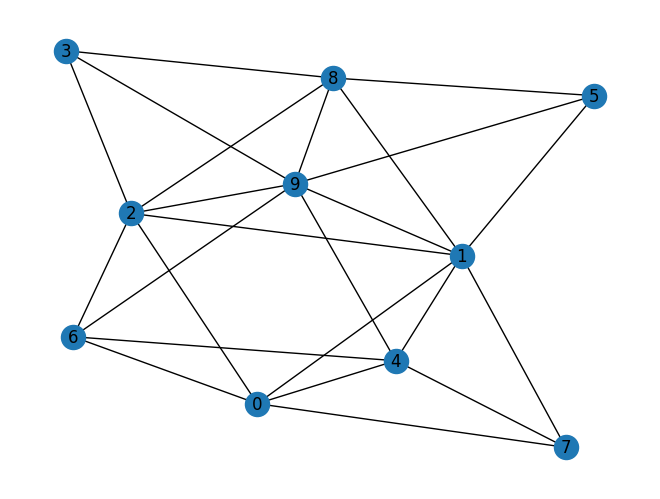

In [428]:
import networkx as nx
import random
import planarity  # Optional but recommended for planarity checks

def generate_random_planar_graph(N):
    # Start with a small cycle to seed a planar graph
    G = nx.cycle_graph(min(N, 3)) if N >= 3 else nx.path_graph(N)

    # Add edges randomly while keeping the graph planar
    while G.number_of_nodes() < N:
        G.add_node(G.number_of_nodes())

    # Randomly add edges while maintaining planarity
    possible_edges = [(u, v) for u in G.nodes() for v in G.nodes() if u < v]
    random.shuffle(possible_edges)

    for u, v in possible_edges:
        if G.number_of_edges() >= 3 * (N - 2):  # Bound for a planar graph
            break
        if not G.has_edge(u, v):
            G.add_edge(u, v)
            if not planarity.is_planar(G):
                G.remove_edge(u, v)  # Remove edge if graph is not planar

    return G



In [548]:
def assign_parents(likelihoods, children):
    par_dict = defaultdict(int)
    for n, l in zip(children, likelihoods):
        parent = list(G.predecessors(n))[0]
        par_dict[parent] += l
    return par_dict


class SoftmaxMargin(Scene):
    
    def construct(self):
        LAYOUT_CONFIG = {"vertex_spacing": (1, 1)}
        VERTEX_CONF = {"radius": 0.25, "color": BLACK, "fill_opacity": 1, "stroke_opacity": 1, "stroke_color": WHITE, "stroke_width": 2}
        
        graph = Graph(
            list(G.nodes), 
            list(G.edges), 
            layout="tree", 
            root_vertex=0, 
            layout_config=LAYOUT_CONFIG,
            vertex_config=VERTEX_CONF,
        )
        leaves = [node for node in G.nodes() if G.degree(node) == 1]
        N_leaves = len(leaves)
        
        GT = leaves[2]
        INDEX_MAP = {n: i for i, n in enumerate(G.nodes())}
        ground_truth = [GT]
        gt = GT
        for _ in range(4):
            for p in G.predecessors(gt):
                ground_truth.append(p)
                gt = p

        leaves_vertices = VGroup(*[graph[l].copy() for l in leaves])

        title = Text("Softmax margin loss", font_size=60).next_to(graph, UP)
        self.play(FadeIn(graph), Write(title))
        self.wait(2)
        self.play(Unwrite(title))

        all_nodes = VGroup(*[graph[l].copy() for l in G.nodes()])

        all_nodes.arrange(buff=0.5)

        self.play(*[Transform(graph[l], all_nodes[i]) for i, l in enumerate(G.nodes())] + [FadeOut(graph.edges[edge]) for edge in graph.edges])

        self.wait(1)

        squares = [Square().scale(0.5).move_to(n.get_center()) for n in all_nodes]
        boxes = VGroup(*squares)

        self.play(FadeIn(boxes))
        self.wait(1)

        self.play(boxes.animate.shift(DOWN))

        cmap = cmasher.get_sub_cmap(sns.dark_palette("#9CDCEB", as_cmap=True), 0, 1)

        logits = [random.uniform(0, 1) for _ in squares]
        logit_text = Text("logits", font_size=20).next_to(boxes, RIGHT)
        # lik_text = Text("likelihoods", font_size=20).next_to(all_nodes, RIGHT)
        # arrow = CurvedArrow(start_point=logit_text.get_right(), end_point=lik_text.get_right()).shift(RIGHT*0.05)
        # softmax_text = MathTex(r"\frac{e^{l_{i}}}{\sum_{j=1}^K e^{l_{j}}}", font_size=20).move_to(arrow.get_right()).shift(RIGHT*0.6)

        color_anim = [square.animate.set_fill(RED, opacity=logits[i]) for i, square in enumerate(squares)]
        text_objs = [Text(f"{l:.2f}", font_size=30).move_to(b.get_center()) for l, b in zip(logits, boxes)] # remove later
        text_anim = [Write(t) for t in text_objs]
        self.play(*(color_anim + text_anim))
        self.play(Write(logit_text))
        self.wait(1)

        # likelihoods = softmax(logits)
        likelihoods = logits
        text_objs_softmax1 = [Text(f"{l:.2f}", font_size=15).move_to(b.get_center()) for l, b in zip(likelihoods, all_nodes)]
        text_anim_softmax = [Write(t) for t in text_objs_softmax1]

        color_anim_softmax = [graph[l].animate.set_fill(rgba_to_color(cmap(likelihoods[i]))) for i, l in enumerate(G.nodes())]
        
        # self.play(*(color_anim_softmax + text_anim_softmax + [Write(softmax_text), Write(arrow), Write(lik_text)]))
        self.play(*(color_anim_softmax + text_anim_softmax))
        self.wait(1)

        # all_texts = text_objs + [logit_text, lik_text, arrow]
        all_texts = text_objs + [logit_text]
        self.play(*[Unwrite(x) for x in all_texts] + [FadeOut(boxes)])

        self.wait(1)

        # Transform nodes and text back to their original graph layout
        original_layout = graph._layout
        labels = text_objs_softmax1

        # Animate nodes and their labels back to their original positions
        for i, l in enumerate(G.nodes()):
            graph[l].generate_target()
            graph[l].target.move_to(original_layout[l])
            labels[i].generate_target()
            labels[i].target.move_to(graph[l].target.get_center())
        
        self.play(
            *[MoveToTarget(graph[l]) for l in G.nodes()],
            *[MoveToTarget(labels[i]) for i, l in enumerate(G.nodes())],
            run_time=2,
            rate_func=smooth
        )
        self.play(*[FadeIn(graph.edges[edge]) for edge in graph.edges])
        
        self.wait(1)

        SCALE_COEF = 0.5

        def get_new_position(obj, SCALE_COEF):
            return obj.get_center() * SCALE_COEF + UP * 2 + RIGHT * 5
        
        def scale_and_move_graph(graph, G, labels, SCALE_COEF, new_position_func):
            anims = []
        
            # Move and scale each node, its label, and its edges
            for i, l in enumerate(G.nodes()):
                # Calculate the new position for the node
                new_position = new_position_func(graph[l], SCALE_COEF)
                node_anim = graph[l].animate.scale(SCALE_COEF).move_to(new_position)
                
                # Move the label to the new position of the node
                label_anim = labels[i].animate.scale(SCALE_COEF).move_to(new_position)
                
                # Append the animations for the node and label
                anims.append(node_anim)
                anims.append(label_anim)
            
            # Move the edges as well
            for edge in graph.edges:
                start_pos = new_position_func(graph[edge[0]], SCALE_COEF)
                end_pos = new_position_func(graph[edge[1]], SCALE_COEF)
            
                # Animate the edge movement along with the nodes
                edge_anim = graph.edges[edge].animate.put_start_and_end_on(start_pos, end_pos)
                anims.append(edge_anim)
            return anims

        anims = scale_and_move_graph(graph, G, labels, SCALE_COEF, get_new_position)
        # Play all animations (nodes, labels, and edges) together
        self.play(*anims)
        self.wait(1)

        # text_loss = Text("Loss", font_size=40).next_to(graph, UP)
        # text_1 = Text("1.", font_size=40).next_to(graph, LEFT)
        # text_2 = Text("2.", font_size=40).next_to(text_1, DOWN*6)
        # text_q = Text("?", font_size=40).next_to(text_2, RIGHT)

        # self.play(*[Write(t) for t in (text_loss, text_1)])
        # self.wait(1)

        # self.play(Write(text_2))
        # self.play(Write(text_q))
        # self.wait(1)

        G_copy = G.to_undirected()

        graph_margin = Graph(
            list(G_copy.nodes), 
            list(G_copy.edges), 
            layout="tree", 
            root_vertex=0, 
            layout_config=LAYOUT_CONFIG,
            vertex_config=VERTEX_CONF,
        )
        self.add_foreground_mobjects(*labels)
        for label in labels:
            label.save_state()
        # self.play(*[Unwrite(t) for t in [text_loss, text_1, text_2, text_q] + labels] + [FadeOut(graph), FadeIn(graph_margin)])
        self.play(*[Unwrite(t) for t in labels] + [FadeOut(graph), FadeIn(graph_margin)])
        self.wait(1)

        NEW_GT = 5
        new_gt = graph_margin[NEW_GT]
        surbox = SurroundingRectangle(new_gt, color=YELLOW)

        self.play(FadeIn(surbox))
        self.wait(1)

        distances = {node: None for node in G_copy.nodes}  # Initialize distances as None
        distances[NEW_GT] = 0  # Distance to the start node is 0

        # Create a dictionary of labels for each node to display distances
        labels_margin = {node: Text("", font_size=30).move_to(graph_margin[node].get_center()) for node in G_copy.nodes()}
        labels_margin[NEW_GT].become(Text("0", font_size=30).move_to(graph_margin[NEW_GT].get_center()))  # Set start distance

        # Add labels to the scene
        self.play(*[FadeIn(label) for label in labels_margin.values()])
        self.wait(1)

        # BFS traversal from the NEW_GT node
        queue = deque([NEW_GT])
        visited = set([NEW_GT])

        cmap = cmasher.get_sub_cmap(sns.dark_palette("#FC6255", as_cmap=True), 0, 1)

        texts = [labels_margin[NEW_GT]]

        while queue:
            current = queue.popleft()
            current_distance = distances[current]

            # Visit each neighbor, including parents and children
            for neighbor in G_copy.neighbors(current):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
                    distances[neighbor] = current_distance + 1
                    
                    # Animate the path to the neighbor
                    try:
                        edge_anim = Create(graph_margin.edges[(current, neighbor)])
                    except KeyError:
                        edge_anim = Create(graph_margin.edges[(neighbor, current)])
                    
                    # Update the distance label on the neighbor node
                    t = Text(str(distances[neighbor]), font_size=30).move_to(graph_margin[neighbor].get_center())
                    texts.append(t)
                    color_anim_margin = graph_margin[neighbor].animate.set_fill(rgba_to_color(cmap(distances[neighbor] / 5)))
                    
                    # Play the animations
                    self.play(color_anim_margin, Write(t), run_time=0.5)

        self.wait(1)

        reverse_colors = [graph_margin[l].animate.set_fill(BLACK) for i, l in enumerate(G_copy.nodes())]

        self.play(*(reverse_colors + [Unwrite(t) for t in texts]))
        
        self.wait(1)

        def info_dist_eqs():
            SHIFT_LEFT = LEFT*6.5
    
            eq_pt = [
                r"p - predicted, t - truth",
            ]
            pt = MathTex(*eq_pt, font_size=30).align_to(SHIFT_LEFT, LEFT).shift(UP*3.5)
    
            eq_lca = [
                r"lca(p, t) - last\ common\ ancestor",
            ]
            lca = MathTex(*eq_lca, font_size=30).align_to(SHIFT_LEFT, LEFT).shift(UP*3)
    
            eq_c = [
                r"C(p) - number\ of\ descendant\ leaves",
            ]
            count = MathTex(*eq_c, font_size=30).align_to(SHIFT_LEFT, LEFT).shift(UP*2.5)
    
            eq = [
                r"margin(p, t) = log(\frac{C(lca(p, t))}{C(p)C(t)})",
            ]
            nll_coef = MathTex(*eq, font_size=35).align_to(SHIFT_LEFT, LEFT).shift(UP*1.5)
            return [pt, lca, count, nll_coef]

        def incorrect_eqs():
            SHIFT_LEFT = LEFT*6.5
    
            eq_pt = [
                r"margin(p, t) = \begin{cases} 0\ if\ predicted\ is\ an\ ancestor\ of\ truth \\ 1\ otherwise \end{cases}",
            ]
            nll_coef = MathTex(*eq_pt, font_size=35).align_to(SHIFT_LEFT, LEFT).shift(UP*3)
            
            return [nll_coef]

        def distance_eqs():
            return []

        def play_margins(margin_type, text_fun, text_size, eqs_func, erase_after=True):
            loss_fn = _hloss.MarginLoss(
                    hier,
                    with_leaf_targets=False,
                    hardness="soft",
                    margin=margin_type,
                    tau=0.01,
            )
    
            margins = np.array(loss_fn.margin[INDEX_MAP[NEW_GT] + 1])
            margins_norm = margins / np.max(margins)
    
            cmap = cmasher.get_sub_cmap(sns.dark_palette("#FC6255", as_cmap=True), 0, 1)
            color_anim_margin = [graph_margin[l].animate.set_fill(rgba_to_color(cmap(margins_norm[INDEX_MAP[l] + 1]))) for i, l in enumerate(G.nodes())]
            text_objs_margin = [Text(text_fun(margins[INDEX_MAP[l] + 1]), font_size=text_size).move_to(graph_margin[l].get_center())
                                for i, l in enumerate(G.nodes())]
            text_anim_margin = [Write(t) for t in text_objs_margin]
            eqs = eqs_func()
            eqs_anims = [FadeIn(e) for e in eqs]
            self.play(*(color_anim_margin + text_anim_margin + eqs_anims))
            self.wait(2)
            if erase_after:
                reverse_colors = [graph_margin[l].animate.set_fill(BLACK) for i, l in enumerate(G_copy.nodes())]
                self.play(*(reverse_colors + [Unwrite(t) for t in text_objs_margin] + [FadeOut(e) for e in eqs]))
                self.wait(1)
            return text_objs_margin

        for mt, ft, fs, es, ea in zip(['depth_dist', 'info_dist', 'incorrect'][::-1], 
                          [lambda t: f"{int(t)}", lambda t: f"{t:.1f}", lambda t: f"{int(t)}"][::-1],
                          [30, 20, 30][::-1],
                          [distance_eqs, info_dist_eqs, incorrect_eqs][::-1],
                          [False, True, True][::-1],
                        ):
            current_margin_labels = play_margins(mt, ft, fs, es, erase_after=ea)

        def get_new_position_margin(obj, SCALE_COEF):
            return obj.get_center() * SCALE_COEF + RIGHT * 5 + DOWN

        # Trying to find values of p_i that will bring _the total sum_ to the smallest value
        # Which means that the values with big margins will be punished more

        self.play(FadeOut(surbox))
        
        anims = scale_and_move_graph(graph_margin, G_copy, current_margin_labels, 0.5, get_new_position_margin)

        text_1 = Text("logits", font_size=30).next_to(graph, UP)
        text_2 = Text("margins", font_size=30).next_to(graph, DOWN*2.2 )
        
        all_nodes = VGroup(*[graph[l].copy() for l in G.nodes()])
        text_objs_softmax1 = [Text(f"{l:.2f}", font_size=7.5).move_to(b.get_center()) for l, b in zip(likelihoods, all_nodes)]
        
        self.play(*[Write(t) for t in [text_1, text_2]] + [FadeIn(graph)] + anims)
        
        self.play(*[Write(t) for t in text_objs_softmax1])
        

        surbox = SurroundingRectangle(graph[NEW_GT], color=YELLOW)
        self.play(FadeIn(surbox))

        self.wait(1)
        
        formula = MathTex(
            r"\mathcal{L} = -\log p_{gt} + \log \sum_{\mathbf{u} \in graph} e^{s_{u} + \tau \cdot \text{margin}(u, gt)}",
            font_size=50
        )
        formula.move_to(LEFT*2)

        # Display the formula
        self.play(Write(formula))
        self.wait(1)

        first_term = formula[0][2:9]  # This selects "-log p_{gt}"
        self.play(first_term.animate.set_color(BLUE)) 
        self.wait(1)

        # You might recognise logsumexp function from when it's used to perform certain calculations that require numerical stability.
        # However, here we use it as a smooth approximation of a maximum. 
        # Long story short, by minimizing this term, we in principle push all the likelihoods down
        # but those that have larger margin, will be penalised harder and thus, go down faster.
        # So, how we choose to set up the margin, will determine how the output structure is enforced.
        # And the little tau term is just here for scaling the margin, since it might have very different range of values.

        p_gt_node = graph[NEW_GT].copy()
        gt_box = VGroup(surbox.copy(), p_gt_node)

        p_term = formula[0][6:9]
        self.play(gt_box.animate.next_to(p_term, UP))
        
        self.wait(1)

        p_term_all = formula[0][22:24]
        p_margin_all = formula[0][32:33]

        p_term_logsumexp = formula[0][10:22]
        br = Brace(p_term_logsumexp, direction=DOWN).set_color(GREEN)
        text_logsumexp = Text('"logsumexp"', font_size=30).next_to(br, DOWN).set_color(GREEN)
        
        self.play(Write(text_logsumexp), Write(br), p_term_logsumexp.animate.set_color(GREEN))

        nodes = []
        
        for n in G.nodes():
            g, gm = graph[n].copy(), graph_margin[n].copy()
            self.play(g.animate.next_to(p_term_all, UP), gm.animate.next_to(p_margin_all, UP))
            nodes.extend([g, gm])

        self.wait(1)

        tau_term = formula[0][25]
        self.play(tau_term.animate.set_color(YELLOW))

        self.wait(1)

        self.play(FadeOut(formula), FadeOut(gt_box), Unwrite(br), Unwrite(text_logsumexp), *[FadeOut(n) for n in nodes])

        # self.play(FadeOut(surbox), FadeOut(text_1), FadeOut(text_2), *(anims_graph + anims_margin))
        self.play(FadeOut(graph), FadeOut(graph_margin), FadeOut(surbox), FadeOut(text_1), FadeOut(text_2), *[Unwrite(t) for t in text_objs_softmax1 + current_margin_labels])

        # Example usage
        N = len(G.nodes())  # Number of nodes
        planar_graph = generate_random_planar_graph(N)

        graph_random = Graph(
            list(planar_graph.nodes), 
            list(planar_graph.edges), 
            layout="spring", 
            layout_config={},
            vertex_config=VERTEX_CONF,
        )

        NEW_GT = 3

        self.play(FadeIn(graph_random))
        distances = {node: None for node in planar_graph.nodes}  # Initialize distances as None
        distances[NEW_GT] = 0  # Distance to the start node is 0
        # BFS traversal from the NEW_GT node
        queue = deque([NEW_GT])
        visited = set([NEW_GT])

        cmap = cmasher.get_sub_cmap(sns.dark_palette("#FC6255", as_cmap=True), 0, 1)
        
        labels_margin = {node: Text("", font_size=30).move_to(graph_random[node].get_center()) for node in planar_graph.nodes()}
        labels_margin[NEW_GT].become(Text("0", font_size=30).move_to(graph_random[NEW_GT].get_center()))  # Set start distance

        self.play(*[FadeIn(label) for label in labels_margin.values()])
        self.wait(1)
        
        texts = [labels_margin[NEW_GT]]

        while queue:
            current = queue.popleft()
            current_distance = distances[current]

            # Visit each neighbor, including parents and children
            for neighbor in planar_graph.neighbors(current):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
                    distances[neighbor] = current_distance + 1
                    
                    # Animate the path to the neighbor
                    try:
                        edge_anim = Create(graph_random.edges[(current, neighbor)])
                    except KeyError:
                        edge_anim = Create(graph_random.edges[(neighbor, current)])
                    
                    # Update the distance label on the neighbor node
                    t = Text(str(distances[neighbor]), font_size=30).move_to(graph_random[neighbor].get_center())
                    texts.append(t)
                    color_anim_margin = graph_random[neighbor].animate.set_fill(rgba_to_color(cmap(distances[neighbor] / 5)))
                    
                    # Play the animations
                    self.play(color_anim_margin, Write(t), run_time=0.25)

        self.wait(1)

In [549]:
%manim SoftmaxMargin

Manim Community v0.18.1

[10/29/24 15:38:54] INFO     Animation 0 : Partial movie file written in                   ]8;id=601148;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=896319;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/3977891868_                         
                             1015906368_223132457.mp4'                                                             

[10/29/24 15:38:55] INFO     Animation 1 : Partial movie file written in                   ]8;id=716200;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=955190;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             784179552_52990091.mp4'                                                               

[10/29/24 15:38:58] INFO     Animation 2 : Partial movie file written in                   ]8;id=637120;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=498356;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             1335711230_1569768591.mp4'                                                            

                    INFO     Animation 3 : Using cached data (hash :                           ]8;id=558051;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=129932;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_4035195194_2355393394)                                                     

                    INFO     Animation 4 : Using cached data (hash :                           ]8;id=548372;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=932418;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2919340033_2122705886)                                                     

                    INFO     Animation 5 : Using cached data (hash :                           ]8;id=139933;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=74985;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2629710179_2501444668)                                                     

                    INFO     Animation 6 : Using cached data (hash :                           ]8;id=123969;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=993404;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2919340033_3246010116)                                                     

                    INFO     Animation 7 : Using cached data (hash :                           ]8;id=190401;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=863435;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_1179880774_23409678)                                                       

[10/29/24 15:39:01] INFO     Animation 8 : Partial movie file written in                   ]8;id=809521;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=303886;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             1133459655_148247676.mp4'                                                             

[10/29/24 15:39:03] INFO     Animation 9 : Partial movie file written in                   ]8;id=278016;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=696652;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             507398208_2856181525.mp4'                                                             

[10/29/24 15:39:04] INFO     Animation 10 : Partial movie file written in                  ]8;id=225738;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=265308;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_841090976.mp4'                                                             

[10/29/24 15:39:07] INFO     Animation 11 : Partial movie file written in                  ]8;id=596784;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=58001;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             949769636_3966905618.mp4'                                                             

[10/29/24 15:39:08] INFO     Animation 12 : Partial movie file written in                  ]8;id=831445;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=390404;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_3519575644.mp4'                                                            

[10/29/24 15:39:10] INFO     Animation 13 : Partial movie file written in                  ]8;id=958503;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=37233;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             692094199_3753961674.mp4'                                                             

[10/29/24 15:39:11] INFO     Animation 14 : Partial movie file written in                  ]8;id=719334;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=536313;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_3508366042.mp4'                                                            

[10/29/24 15:39:14] INFO     Animation 15 : Partial movie file written in                  ]8;id=886359;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=479212;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2467973394_1201740263.mp4'                                                            

[10/29/24 15:39:15] INFO     Animation 16 : Partial movie file written in                  ]8;id=557926;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=894547;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             3502178733_991263065.mp4'                                                             

[10/29/24 15:39:16] INFO     Animation 17 : Partial movie file written in                  ]8;id=108833;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=271661;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_257345069.mp4'                                                             

[10/29/24 15:39:18] INFO     Animation 18 : Partial movie file written in                  ]8;id=697658;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=166187;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             3483068079_3131438572.mp4'                                                            

[10/29/24 15:39:19] INFO     Animation 19 : Partial movie file written in                  ]8;id=998896;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=697947;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_2484517496.mp4'                                                            

[10/29/24 15:39:23] INFO     Animation 20 : Partial movie file written in                  ]8;id=843892;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=759958;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2288566841_1063939544.mp4'                                                            

[10/29/24 15:39:24] INFO     Animation 21 : Partial movie file written in                  ]8;id=121547;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=188997;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_1123168903.mp4'                                                            

                    INFO     Animation 22 : Using cached data (hash :                          ]8;id=712052;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=806403;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_1421991312_1689037966)                                                     

                    INFO     Animation 23 : Using cached data (hash :                          ]8;id=420340;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=208823;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2919340033_2349115209)                                                     

                    INFO     Animation 24 : Using cached data (hash :                          ]8;id=755979;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=428075;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_1328744886_3073220850)                                                     

                    INFO     Animation 25 : Using cached data (hash :                          ]8;id=617972;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=293040;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2919340033_2196838835)                                                     

                    INFO     Animation 26 : Using cached data (hash :                          ]8;id=597357;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=69515;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_3601138319_1653218197)                                                     

[10/29/24 15:39:25] INFO     Animation 27 : Partial movie file written in                  ]8;id=314420;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=68916;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             1103782311_1815098909.mp4'                                                            

                    INFO     Animation 28 : Partial movie file written in                  ]8;id=634165;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=916597;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2734734555_3514897511.mp4'                                                            

[10/29/24 15:39:26] INFO     Animation 29 : Partial movie file written in                  ]8;id=619744;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=404431;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2857189056_3438792917.mp4'                                                            

                    INFO     Animation 30 : Using cached data (hash :                          ]8;id=281005;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=160323;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_28925366_3607319093)                                                       

                    INFO     Animation 31 : Using cached data (hash :                          ]8;id=735789;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=414431;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2642413771_4233695726)                                                     

                    INFO     Animation 32 : Using cached data (hash :                          ]8;id=640219;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=338640;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_815388963_261788858)                                                       

[10/29/24 15:39:27] INFO     Animation 33 : Partial movie file written in                  ]8;id=529885;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=498944;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             3500259534_1687549831.mp4'                                                            

                    INFO     Animation 34 : Partial movie file written in                  ]8;id=701577;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=964539;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             4205799598_199899208.mp4'                                                             

[10/29/24 15:39:28] INFO     Animation 35 : Partial movie file written in                  ]8;id=759239;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=87938;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             3989463776_2710716420.mp4'                                                            

                    INFO     Animation 36 : Using cached data (hash :                          ]8;id=584475;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=653301;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2919340033_989196112)                                                      

                    INFO     Animation 37 : Using cached data (hash :                          ]8;id=191368;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=304858;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_4237925025_1605490944)                                                     

[10/29/24 15:39:29] INFO     Animation 38 : Partial movie file written in                  ]8;id=119722;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=340162;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_4050601936.mp4'                                                            

[10/29/24 15:39:30] INFO     Animation 39 : Using cached data (hash :                          ]8;id=633303;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=211381;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_3208962682_1852376454)                                                     

[10/29/24 15:39:32] INFO     Animation 40 : Partial movie file written in                  ]8;id=728797;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=51131;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             634017564_3081198815.mp4'                                                             

                    INFO     Animation 41 : Using cached data (hash :                          ]8;id=532888;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=367421;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_3757588350_982767219)                                                      

                    INFO     Animation 42 : Using cached data (hash :                          ]8;id=203855;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=472785;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2919340033_1920033923)                                                     

[10/29/24 15:39:33] INFO     Animation 43 : Using cached data (hash :                          ]8;id=736554;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=377503;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_1601023428_147279102)                                                      

[10/29/24 15:39:34] INFO     Animation 44 : Using cached data (hash :                          ]8;id=763111;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=941718;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_784179552_1397874983)                                                      

                    INFO     Animation 45 : Using cached data (hash :                          ]8;id=288182;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=401837;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_1867019433_2416901263)                                                     

                    INFO     Animation 46 : Using cached data (hash :                          ]8;id=519403;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=701465;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2919340033_784683927)                                                      

                    INFO     Animation 47 : Using cached data (hash :                          ]8;id=872358;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=27699;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_4155164207_2670620055)                                                     

[10/29/24 15:39:36] INFO     Animation 48 : Partial movie file written in                  ]8;id=592406;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=366988;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             634017564_3523675871.mp4'                                                             

                    INFO     Animation 49 : Using cached data (hash :                          ]8;id=209981;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=807076;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_2130259055_2929964835)                                                     

[10/29/24 15:39:38] INFO     Animation 50 : Partial movie file written in                  ]8;id=775942;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=878797;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             246526685_2088799548.mp4'                                                             

[10/29/24 15:39:41] INFO     Animation 51 : Partial movie file written in                  ]8;id=568498;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=871244;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             1531343666_4106203714.mp4'                                                            

[10/29/24 15:39:42] INFO     Animation 52 : Partial movie file written in                  ]8;id=551978;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=451633;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2668195047_4122084861.mp4'                                                            

[10/29/24 15:39:43] INFO     Animation 53 : Partial movie file written in                  ]8;id=941251;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=312578;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_2577790973.mp4'                                                            

[10/29/24 15:39:48] INFO     Animation 54 : Partial movie file written in                  ]8;id=73417;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=536033;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2485055379_2549535130.mp4'                                                            

[10/29/24 15:39:49] INFO     Animation 55 : Partial movie file written in                  ]8;id=224949;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=539270;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_1834381513.mp4'                                                            

[10/29/24 15:39:51] INFO     Animation 56 : Partial movie file written in                  ]8;id=63367;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=294094;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             454661110_3860637081.mp4'                                                             

[10/29/24 15:39:52] INFO     Animation 57 : Partial movie file written in                  ]8;id=401051;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=798921;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_2039532033.mp4'                                                            

[10/29/24 15:39:54] INFO     Animation 58 : Partial movie file written in                  ]8;id=73367;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=552942;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             4257404866_352694711.mp4'                                                             

[10/29/24 15:39:56] INFO     Animation 59 : Partial movie file written in                  ]8;id=191853;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=5325;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_2058491327.mp4'                                                            

[10/29/24 15:39:58] INFO     Animation 60 : Partial movie file written in                  ]8;id=456220;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=569544;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             3572257427_382718743.mp4'                                                             

[10/29/24 15:40:01] INFO     Animation 61 : Partial movie file written in                  ]8;id=124006;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=162351;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             3824282931_1808574689.mp4'                                                            

[10/29/24 15:40:03] INFO     Animation 62 : Partial movie file written in                  ]8;id=852539;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=371700;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2710379657_1301398190.mp4'                                                            

[10/29/24 15:40:06] INFO     Animation 63 : Partial movie file written in                  ]8;id=259533;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=722331;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             370991417_40070032.mp4'                                                               

[10/29/24 15:40:08] INFO     Animation 64 : Partial movie file written in                  ]8;id=640225;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=821038;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2850011086_114711949.mp4'                                                             

[10/29/24 15:40:11] INFO     Animation 65 : Partial movie file written in                  ]8;id=396488;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=745477;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2877133321_375500104.mp4'                                                             

[10/29/24 15:40:13] INFO     Animation 66 : Partial movie file written in                  ]8;id=354956;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=801691;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             3880232376_2709906143.mp4'                                                            

[10/29/24 15:40:16] INFO     Animation 67 : Partial movie file written in                  ]8;id=978795;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=406347;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             3999838691_1676974033.mp4'                                                            

[10/29/24 15:40:18] INFO     Animation 68 : Partial movie file written in                  ]8;id=531609;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=877385;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             1012354828_2848003175.mp4'                                                            

[10/29/24 15:40:21] INFO     Animation 69 : Partial movie file written in                  ]8;id=431089;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=801643;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             155608101_1960290038.mp4'                                                             

[10/29/24 15:40:23] INFO     Animation 70 : Partial movie file written in                  ]8;id=13367;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=915442;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             4124490054_2446573655.mp4'                                                            

[10/29/24 15:40:26] INFO     Animation 71 : Partial movie file written in                  ]8;id=153605;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=406204;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             1046034768_3110077772.mp4'                                                            

[10/29/24 15:40:28] INFO     Animation 72 : Partial movie file written in                  ]8;id=42095;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=826307;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_1237099715.mp4'                                                            

[10/29/24 15:40:31] INFO     Animation 73 : Partial movie file written in                  ]8;id=521644;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=209899;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             704862025_2311869434.mp4'                                                             

[10/29/24 15:40:32] INFO     Animation 74 : Partial movie file written in                  ]8;id=955052;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=676640;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_3677181764.mp4'                                                            

[10/29/24 15:40:35] INFO     Animation 75 : Partial movie file written in                  ]8;id=301463;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=82680;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2364338352_2896774166.mp4'                                                            

[10/29/24 15:40:38] INFO     Animation 76 : Partial movie file written in                  ]8;id=355673;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=476329;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             4229539587_4255273007.mp4'                                                            

[10/29/24 15:40:40] INFO     Animation 77 : Partial movie file written in                  ]8;id=954226;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=665021;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             1124293409_2397950137.mp4'                                                            

[10/29/24 15:40:41] INFO     Animation 78 : Partial movie file written in                  ]8;id=282335;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=470248;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2238769893_1805649766.mp4'                                                            

[10/29/24 15:40:42] INFO     Animation 79 : Partial movie file written in                  ]8;id=25975;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=193969;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_3048832794.mp4'                                                            

                    INFO     Animation 80 : Partial movie file written in                  ]8;id=478717;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=404661;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             441012607_3843037270.mp4'                                                             

[10/29/24 15:40:43] INFO     Animation 81 : Partial movie file written in                  ]8;id=746837;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=70090;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             3669663145_4100083972.mp4'                                                            

                    INFO     Animation 82 : Partial movie file written in                  ]8;id=146510;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=619191;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2652953602_3790002788.mp4'                                                            

[10/29/24 15:40:44] INFO     Animation 83 : Partial movie file written in                  ]8;id=85484;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=202561;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2630710495_4177087626.mp4'                                                            

                    INFO     Animation 84 : Partial movie file written in                  ]8;id=418375;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=869400;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2123383823_2880222795.mp4'                                                            

[10/29/24 15:40:45] INFO     Animation 85 : Partial movie file written in                  ]8;id=457914;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=516241;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             3603746175_658074919.mp4'                                                             

                    INFO     Animation 86 : Partial movie file written in                  ]8;id=867091;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=688370;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             3138764716_288781701.mp4'                                                             

[10/29/24 15:40:46] INFO     Animation 87 : Partial movie file written in                  ]8;id=875194;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=499989;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             161961825_451500796.mp4'                                                              

                    INFO     Animation 88 : Partial movie file written in                  ]8;id=765934;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=749248;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             350614704_2230337031.mp4'                                                             

[10/29/24 15:40:47] INFO     Animation 89 : Partial movie file written in                  ]8;id=395109;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=697021;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             376715407_3824535216.mp4'                                                             

                    INFO     Animation 90 : Partial movie file written in                  ]8;id=451412;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=266204;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/SoftmaxMargin/2852726489_                         
                             2919340033_1049843520.mp4'                                                            

                    INFO     Combining to Movie file.                                      ]8;id=719770;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=920381;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#617\617]8;;\

[10/29/24 15:40:48] INFO                                                                   ]8;id=397376;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=305177;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/SoftmaxMargin.mp4'                                                    
                                                                                                                   

                    INFO     The partial movie directory is full (> 100 files). Therefore, ]8;id=506619;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=141996;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#707\707]8;;\
                             manim has removed the 67 oldest file(s). You can change this                          
                             behaviour by changing max_files_cached in config.                                     

                    INFO     Rendered SoftmaxMargin                                                    ]8;id=129911;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=735968;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 91 animations                                                                  

# Outro

In [607]:
class Outro(Scene):
    
    def construct(self):
        flat_softmax = Text("Flat softmax").move_to(UP*2 + LEFT * 3, LEFT).to_edge(LEFT)
        conditional_softmax = Text("Conditional softmax").align_to(flat_softmax, LEFT).next_to(flat_softmax, DOWN*4).to_edge(LEFT)
        softmax_margin = Text("Softmax margin").align_to(flat_softmax, LEFT).next_to(conditional_softmax, DOWN*4).to_edge(LEFT)

        # Load images and position them to the right of each text label
        runner_image = ImageMobject("images/runner.jpg").scale(0.2).next_to(flat_softmax, RIGHT, buff=0.5)
        ballerina_image = ImageMobject("images/balerina.jpg").scale(0.2).next_to(softmax_margin, RIGHT, buff=0.5)

        # Display text and images
        self.play(Write(flat_softmax))
        self.play(Write(conditional_softmax))
        self.play(Write(softmax_margin))

        self.play(FadeIn(runner_image))
        self.play(FadeIn(ballerina_image))

        # Hold the scene
        self.wait(2)
        
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        
        # Author information text
        author_info = Text(
            "Svetlana Kutuzova\nComputer Science postdoc at the University of Copenhagen"
        ).scale(0.5)
        university_logo = ImageMobject("images/ku_logo.png").scale(0.2).next_to(author_info, LEFT, buff=0.3)
        twitter_logo = ImageMobject("images/twitter_logo.png").scale(0.04).next_to(university_logo, DOWN, buff=0.3)
        twitter_handle = Text(
            "@sveta_kutuzova"
        ).scale(0.5).next_to(twitter_logo, RIGHT)
        # Manim icon and text
        manim_text = Text("Animations made with Manim").scale(0.5)
        manim_icon = ImageMobject("images/manim_logo.png").scale(0.2).next_to(manim_text, LEFT, buff=0.3)

        # Group the text and icon and center them
        manim_group = Group(manim_icon, manim_text).to_edge(DOWN).shift(UP)

        # Display the information
        self.play(FadeIn(author_info), FadeIn(manim_group), FadeIn(university_logo), FadeIn(twitter_handle), FadeIn(twitter_logo))

        # Hold the scene
        self.wait(2)

In [608]:
%manim Outro 

Manim Community v0.18.1

[10/29/24 16:31:26] INFO     Animation 0 : Using cached data (hash :                           ]8;id=678020;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=776331;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             3977891868_980440002_223132457)                                                       

                    INFO     Animation 1 : Using cached data (hash :                           ]8;id=694371;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=65244;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_3153074870_3934972073)                                                     

                    INFO     Animation 2 : Using cached data (hash :                           ]8;id=293882;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=267369;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_3666362178_44419431)                                                       

                    INFO     Animation 3 : Using cached data (hash :                           ]8;id=15180;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=148538;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_3543831689_2986738702)                                                     

                    INFO     Animation 4 : Using cached data (hash :                           ]8;id=418501;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=491780;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_4219831269_3932079046)                                                     

[10/29/24 16:31:27] INFO     Animation 5 : Using cached data (hash :                           ]8;id=678226;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=527018;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_784179552_2479694363)                                                      

                    INFO     Animation 6 : Using cached data (hash :                           ]8;id=523841;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=976394;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             2852726489_3397835418_207173621)                                                      

[10/29/24 16:31:33] INFO     Animation 7 : Partial movie file written in                   ]8;id=184001;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=134703;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/Outro/2852726489_23840077                         
                             98_223132457.mp4'                                                                     

[10/29/24 16:31:35] INFO     Animation 8 : Partial movie file written in                   ]8;id=61315;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=297958;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/Outro/2852726489_78417955                         
                             2_1390273317.mp4'                                                                     

                    INFO     Combining to Movie file.                                      ]8;id=87349;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=897561;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=944745;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=27959;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/Outro.mp4'                                                            
                                                                                                                   

                    INFO     Rendered Outro                                                            ]8;id=356283;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=492345;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 9 animations                                                                   